In [1]:
!pip install tensorflow
!pip install pandas
!pip install plotly
!pip install statsmodels

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/includ

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/includ

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt # data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt
import random 


from matplotlib import cm as cm

Dopo aver importato le librerie che mi saranno utili in seguito , analizzerò in modo accurato i dati contententi in pokemon.csv e poi correlerò essi con train.csv e test.csv . Mi sembra utile e fondamentale proseguire in questo modo . 

In [3]:
pokemon = pd.read_csv("./pokemon.csv")

In [4]:
pokemon

#            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0      1       Bulbasaur    Grass  Poison  45      49       49       65   
1      2         Ivysaur    Grass  Poison  60      62       63       80   
2      3        Venusaur    Grass  Poison  80      82       83      100   
3      4   Mega Venusaur    Grass  Poison  80     100      123      122   
4      5      Charmander     Fire     NaN  39      52       43       60   
..   ...             ...      ...     ...  ..     ...      ...      ...   
795  796         Diancie     Rock   Fairy  50     100      150      100   
796  797    Mega Diancie     Rock   Fairy  50     160      110      160   
797  798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798  799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799  800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  
0         65     45           1      False  
1         80     60           1      False  
2        100     80           1      False  
3        120     80           1      False  
4         50     65           1      False  
..       ...    ...         ...        ...  
795      150     50           6       True  
796      110    110           6       True  
797      130     70           6       True  
798      130     80           6       True  
799       90     70           6       True  

[800 rows x 12 columns]

Il numero (ID) relativo ad un pokemon è identificato dall' # , ciò potrebbe creare confusione e problemi nella ricerca o assegnazione di valori poiche # può essere visto dal compilatore come inizio di un commento , quindi dato che ho riscontrato dei problemi preferisco cambiare il nome della colonna # con Number .

In [5]:
pokemon = pokemon.rename(index=str, columns={"#": "Number"})

In [6]:
#verifico cambiamento 
pokemon.head()

Number           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0       1      Bulbasaur  Grass  Poison  45      49       49       65   
1       2        Ivysaur  Grass  Poison  60      62       63       80   
2       3       Venusaur  Grass  Poison  80      82       83      100   
3       4  Mega Venusaur  Grass  Poison  80     100      123      122   
4       5     Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [7]:
pokemon.isnull().sum() #valori nulli 

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Ho stampato il numero di valori nulli presenti nella tabella pokemon , possiamo vedere come molto spesso alcuni pokemon non hanno una seconda tipologia e può essere ammissibile . Ma in questo caso noto che un valore relativo al nome è nullo , cio non può essere possibile , quindi ora individuerò la riga dove il valore non è presente e lo sostituisco con un nome randomico , faccio questo e non elimino la riga poichè potrebbero presentarsi molti errori nel predire e analizzare i dati .. Mi sono posto la domanda: E se tutti i pokemon combattessero proprio contro il pokemon "senza nome" ? Eliminerei tutta la tabella ...

In [8]:
pokemon[pokemon['Name'].isnull()]

Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation  Legendary  
62     95           1      False

L'ho indivituato è nella posizione 62 , con Number : 63 . Ora provvedo ad assegnargli un nome inventato da me : "Alex"  . Bisognerebbe fare una ricerca sulla base delle sue skills e capire quale pokemon manca all'appello ..Ma meglio Alex che NaN

In [9]:
pokemon['Name'][62] = "Alex"

<ipython-input-9-a300fdcbf2da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon['Name'][62] = "Alex"


In [10]:
pokemon.isnull().sum() #valori nulli --> ora nessun nome ha valore NaN 

Number          0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### Ora analizzo e salvo nelle variabili combatTrain e combatTest i file train.csv e test.csv 

#### Train

In [11]:
combatTrain = pd.read_csv("./train.csv")

In [12]:
print("Dimensione della tabella Combat relativo al training : " + str(combatTrain.shape))

Dimensione della tabella Combat relativo al training : (30000, 3)


In [13]:
combatTrain.isnull().sum() #valori nulli

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

#### Test

In [14]:
combatTest = pd.read_csv("./test.csv")

In [15]:
print("Dimensione della tabella Combat relativo al test : " + str(combatTest.shape))

Dimensione della tabella Combat relativo al test : (10000, 3)


In [16]:
combatTest.isnull().sum() #valori nulli

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

### Come ho proceduto per poi analizzare i dati ...

Ora analizzerò i dati relativi al combat riuscendo ad estrapolare qualche dato imporante per ulteriori analisi , ad esempio calcolando la  ` percentuale di vittoria di ogni pokemon ` , per poi confrontare le sue statistiche (del pokemon vincitore) che contribuiscono di piu alla vittoria 

Una volta aver ottenuto dati specifici per l'analisi farò il merge fra combat e pokemon , in questo caso i dati del combat sono divisi a causa dello split ( per il train e test ) , dovrò eseguire gli stessi passi su tutti e due i file di combat.
Ovviamente però analizzerò in dettaglio solo i dati di train con cui addestrerò la mia rete , per calcolare la mae .

In [17]:
#calcolo la % di vittorie per ogni pokemon in modo raggruppato 
total_WinsTrain = combatTrain.Winner.value_counts()

In [18]:
numberOfWinsTrain = combatTrain.groupby('Winner').count()

In [19]:
countByFirstTrain = combatTrain.groupby('Second_pokemon').count()
countByFirstTrain.shape            #numero dei pokemon presenti in seconda posizione

(784, 2)

In [20]:
countBySecondTrain = combatTrain.groupby('First_pokemon').count()
countBySecondTrain.shape          #numero dei pokemon presenti in prima posizione 

(784, 2)

In [21]:
numberOfWinsTrain.shape   #numero dei pokemon che hanno vinto  , è minore dei totali!

(782, 2)

Un dato importante!!! Ho visto che ci sono 784 tipologie di pokemon che combattono , ovviamente l'ho verificato con count() per le colonne first e second , se i dati erano diversi allora qualche pokemon avrebbe combatutto da solo... 
Verificando il numero di pokemon vincitori ho scoperto che sono in totale 782 tipologie .. 2 in meno del totale , quindi posso affermare analizzando i dati di train (di combat) sicuramente 2 pokemon non sono riusciti nenanche a vincere uno scontro.... potrebbe essere anche che non abbiano combattuto.. ma comunque registrano 0 vittorie.
Vediamo chi sono :  

In [22]:
find_losing_pokemon= np.setdiff1d(countByFirstTrain.index.values, numberOfWinsTrain.index.values)-1 #offset because the index and number are off by one
for i in range(2):
    losing_pokemon = pokemon.iloc[find_losing_pokemon[i],]
    print(losing_pokemon)
    print("--------------------------")

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object
--------------------------
Number            577
Name            Munna
Type 1        Psychic
Type 2            NaN
HP                 76
Attack             25
Defense            45
Sp. Atk            67
Sp. Def            55
Speed              24
Generation          5
Legendary       False
Name: 576, dtype: object
--------------------------


Shuckle e Munna sono i due pokemon che non hanno mai vinto uno scontro ... eccoli i loro dati stampati sopra .

Potrebbero anche esserci dei pokemon che non hanno mai combattuto nemmeno una battaglia e quindi non sono registrati . La percentuale delle vincite è importantissima secondo la mia opinione e sopratutto ci fa anche capire se un pokemon non ha combattuto . La calcolo e poi la corrello alla tabella pokemon facendo un merge ben preciso . 
Aggiungo al file di combat quindi due feature fondamentali e importanti che riassumono quello detto sopra che sono percentuale delle vincite e per calcolarla ovviamente ho ricavato gli scontri totali di ogni pokemon. 

In [23]:
numberOfWinsTrain = numberOfWinsTrain.sort_index()  #ordinamento
numberOfWinsTrain['Total Fights'] = countByFirstTrain.Winner + countBySecondTrain.Winner #Numero totale degli scontri 
numberOfWinsTrain['Win Percentage']= numberOfWinsTrain.First_pokemon/numberOfWinsTrain['Total Fights']  # % vittorie pokemon
numberOfWinsTrain

First_pokemon  Second_pokemon  Total Fights  Win Percentage
Winner                                                             
1                  21              21            77        0.272727
2                  28              28            74        0.378378
3                  52              52            80        0.650000
4                  41              41            78        0.525641
5                  35              35            70        0.500000
...               ...             ...           ...             ...
796                23              23            64        0.359375
797                67              67            78        0.858974
798                36              36            70        0.514286
799                56              56            88        0.636364
800                51              51            85        0.600000

[782 rows x 4 columns]

il pokemon con index 1 ha vinto 21 scontri su 77 quindi la percentuale di vittoria è del 27% circa. Le colonne degli scontri vinti sono duplicate ....

### MERGE! 

In [24]:
# ora è il momento di fare merge ! Cioè unire le due tabelle di dati pokemon e quelle di combat sulla base degli indice e numero esatto 
results2Train = pd.merge(pokemon, numberOfWinsTrain, right_index = True, left_on='Number')
results3Train = pd.merge(pokemon, numberOfWinsTrain, left_on='Number', right_index = True, how='left')

In [25]:
results2Train

Number            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0         1       Bulbasaur    Grass  Poison  45      49       49       65   
1         2         Ivysaur    Grass  Poison  60      62       63       80   
2         3        Venusaur    Grass  Poison  80      82       83      100   
3         4   Mega Venusaur    Grass  Poison  80     100      123      122   
4         5      Charmander     Fire     NaN  39      52       43       60   
..      ...             ...      ...     ...  ..     ...      ...      ...   
795     796         Diancie     Rock   Fairy  50     100      150      100   
796     797    Mega Diancie     Rock   Fairy  50     160      110      160   
797     798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798     799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799     800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  First_pokemon  Second_pokemon  \
0         65     45           1      False             21              21   
1         80     60           1      False             28              28   
2        100     80           1      False             52              52   
3        120     80           1      False             41              41   
4         50     65           1      False             35              35   
..       ...    ...         ...        ...            ...             ...   
795      150     50           6       True             23              23   
796      110    110           6       True             67              67   
797      130     70           6       True             36              36   
798      130     80           6       True             56              56   
799       90     70           6       True             51              51   

     Total Fights  Win Percentage  
0              77        0.272727  
1              74        0.378378  
2              80        0.650000  
3              78        0.525641  
4              70        0.500000  
..            ...             ...  
795            64        0.359375  
796            78        0.858974  
797            70        0.514286  
798            88        0.636364  
799            85        0.600000  

[782 rows x 16 columns]

In [26]:
results3Train

Number            Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0         1       Bulbasaur    Grass  Poison  45      49       49       65   
1         2         Ivysaur    Grass  Poison  60      62       63       80   
2         3        Venusaur    Grass  Poison  80      82       83      100   
3         4   Mega Venusaur    Grass  Poison  80     100      123      122   
4         5      Charmander     Fire     NaN  39      52       43       60   
..      ...             ...      ...     ...  ..     ...      ...      ...   
795     796         Diancie     Rock   Fairy  50     100      150      100   
796     797    Mega Diancie     Rock   Fairy  50     160      110      160   
797     798  Hoopa Confined  Psychic   Ghost  80     110       60      150   
798     799   Hoopa Unbound  Psychic    Dark  80     160       60      170   
799     800       Volcanion     Fire   Water  80     110      120      130   

     Sp. Def  Speed  Generation  Legendary  First_pokemon  Second_pokemon  \
0         65     45           1      False           21.0            21.0   
1         80     60           1      False           28.0            28.0   
2        100     80           1      False           52.0            52.0   
3        120     80           1      False           41.0            41.0   
4         50     65           1      False           35.0            35.0   
..       ...    ...         ...        ...            ...             ...   
795      150     50           6       True           23.0            23.0   
796      110    110           6       True           67.0            67.0   
797      130     70           6       True           36.0            36.0   
798      130     80           6       True           56.0            56.0   
799       90     70           6       True           51.0            51.0   

     Total Fights  Win Percentage  
0            77.0        0.272727  
1            74.0        0.378378  
2            80.0        0.650000  
3            78.0        0.525641  
4            70.0        0.500000  
..            ...             ...  
795          64.0        0.359375  
796          78.0        0.858974  
797          70.0        0.514286  
798          88.0        0.636364  
799          85.0        0.600000  

[800 rows x 16 columns]

Controllo se qualche pokemon non è sceso in battaglia!

In [27]:
results3Train[results3Train['Win Percentage'].isnull()]

Number                  Name    Type 1   Type 2   HP  Attack  Defense  \
11       12             Blastoise     Water      NaN   79      83      100   
32       33             Sandshrew    Ground      NaN   50      75       85   
45       46            Wigglytuff    Normal    Fairy  140      70       45   
65       66               Poliwag     Water      NaN   40      50       40   
77       78            Victreebel     Grass   Poison   80     105       65   
89       90              Magneton  Electric    Steel   50      60       95   
143     144                 Ditto    Normal      NaN   48      48       48   
182     183               Ariados       Bug   Poison   70      90       70   
230     231               Shuckle       Bug     Rock   20      10      230   
235     236              Ursaring    Normal      NaN   90     130       75   
321     322              Hariyama  Fighting      NaN  144     120       60   
418     419           Mega Latias    Dragon  Psychic   80     100      120   
478     479             Honchkrow      Dark   Flying  100     125       52   
555     556               Servine     Grass      NaN   60      60       75   
576     577                 Munna   Psychic      NaN   76      25       45   
617     618              Maractus     Grass      NaN   75      86       67   
654     655             Jellicent     Water    Ghost  100      60       70   
781     782  Pumpkaboo Small Size     Ghost    Grass   44      66       70   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  First_pokemon  \
11        85      105     78           1      False            NaN   
32        20       30     40           1      False            NaN   
45        85       50     45           1      False            NaN   
65        40       40     90           1      False            NaN   
77       100       70     70           1      False            NaN   
89       120       70     70           1      False            NaN   
143       48       48     48           1      False            NaN   
182       60       60     40           2      False            NaN   
230       10      230      5           2      False            NaN   
235       75       75     55           2      False            NaN   
321       40       60     50           3      False            NaN   
418      140      150    110           3       True            NaN   
478      105       52     71           4      False            NaN   
555       60       75     83           5      False            NaN   
576       67       55     24           5      False            NaN   
617      106       67     60           5      False            NaN   
654       85      105     60           5      False            NaN   
781       44       55     56           6      False            NaN   

     Second_pokemon  Total Fights  Win Percentage  
11              NaN           NaN             NaN  
32              NaN           NaN             NaN  
45              NaN           NaN             NaN  
65              NaN           NaN             NaN  
77              NaN           NaN             NaN  
89              NaN           NaN             NaN  
143             NaN           NaN             NaN  
182             NaN           NaN             NaN  
230             NaN           NaN             NaN  
235             NaN           NaN             NaN  
321             NaN           NaN             NaN  
418             NaN           NaN             NaN  
478             NaN           NaN             NaN  
555             NaN           NaN             NaN  
576             NaN           NaN             NaN  
617             NaN           NaN             NaN  
654             NaN           NaN             NaN  
781             NaN           NaN             NaN

Come possiamo vedere 18 pokemon non hanno combattutoo!

#### Primi 10 pokemon con la minor percentuale di vincita

In [28]:
results3Train[np.isfinite(results3Train['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

Number      Name   Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
236     237    Slugma     Fire     NaN  40      40       40       70       40   
752     753  Spritzee    Fairy     NaN  78      52       60       63       65   
638     639   Solosis  Psychic     NaN  45      30       40      105       50   
189     190    Togepi    Fairy     NaN  35      20       65       40       65   
289     290   Silcoon      Bug     NaN  50      35       55       25       25   
187     188    Cleffa    Fairy     NaN  50      25       28       45       55   
48       49    Oddish    Grass  Poison  45      50       55       75       65   
394     395    Wynaut  Psychic     NaN  95      23       48       23       48   
398     399    Spheal      Ice   Water  70      40       50       55       50   
733     734    Spewpa      Bug     NaN  45      22       60       27       30   

     Speed  Generation  Legendary  First_pokemon  Second_pokemon  \
236     20           2      False            1.0             1.0   
752     23           6      False            3.0             3.0   
638     20           5      False            3.0             3.0   
189     20           2      False            3.0             3.0   
289     15           3      False            3.0             3.0   
187     15           2      False            3.0             3.0   
48      30           1      False            4.0             4.0   
394     23           3      False            4.0             4.0   
398     25           3      False            4.0             4.0   
733     29           6      False            4.0             4.0   

     Total Fights  Win Percentage  
236          68.0        0.014706  
752          87.0        0.034483  
638          76.0        0.039474  
189          74.0        0.040541  
289          73.0        0.041096  
187          65.0        0.046154  
48           81.0        0.049383  
394          81.0        0.049383  
398          75.0        0.053333  
733          75.0        0.053333

#### Primi 10 pokemon con la miglior percentuale di vincita

In [29]:
results3Train[np.isfinite(results3Train['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

Number             Name    Type 1    Type 2   HP  Attack  Defense  \
154     155  Mega Aerodactyl      Rock    Flying   80     135       85   
512     513          Weavile      Dark       Ice   70     120       65   
153     154       Aerodactyl      Rock    Flying   80     105       65   
726     727         Greninja     Water      Dark   72      95       67   
164     165    Mega Mewtwo Y   Psychic       NaN  106     150       70   
476     477     Mega Lopunny    Normal  Fighting   65     136       94   
262     263           Raikou  Electric       NaN   90      85       75   
681     682         Mienshao  Fighting       NaN   65     125       60   
275     276    Mega Sceptile     Grass    Dragon   70     110       75   
19       20    Mega Beedrill       Bug    Poison   65     150       40   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  First_pokemon  \
154       70       95    150           1      False           81.0   
512       45       85    125           4      False           70.0   
153       60       75    130           1      False           83.0   
726      103       71    122           6      False           79.0   
164      194      120    140           1       True           79.0   
476       54       96    135           4      False           78.0   
262      115      100    115           2       True           49.0   
681       95       60    105           5      False           72.0   
275      145       85    145           3      False           72.0   
19        15       80    145           1      False           69.0   

     Second_pokemon  Total Fights  Win Percentage  
154            81.0          82.0        0.987805  
512            70.0          71.0        0.985915  
153            83.0          86.0        0.965116  
726            79.0          82.0        0.963415  
164            79.0          82.0        0.963415  
476            78.0          81.0        0.962963  
262            49.0          51.0        0.960784  
681            72.0          75.0        0.960000  
275            72.0          75.0        0.960000  
19             69.0          72.0        0.958333

Mettendo a confronto i 10 pokemon che detengono le percentuali di vittorie piu alte e basse, ad intuito e visione dei dati si possono capire mooolte cose . I valori ovviamente di attacco e velocità sono molto ma molto elevati nel secondo caso rispetto al primo ... Le tipologie dei pokemon anche son praticamente differenti (quasi) tutte quante della prima e seconda tabella . Il prefisso mega davanti al nome del pokemon aumenta le sue prestazioni (evoluzione del pokemon) .

In [30]:
results3Train.describe()

Number          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.0000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   400.5000   69.258750   79.001250   73.842500   72.820000   71.902500   
std    231.0844   25.534669   32.457366   31.183501   32.722294   27.828916   
min      1.0000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    200.7500   50.000000   55.000000   50.000000   49.750000   50.000000   
50%    400.5000   65.000000   75.000000   70.000000   65.000000   70.000000   
75%    600.2500   80.000000  100.000000   90.000000   95.000000   90.000000   
max    800.0000  255.000000  190.000000  230.000000  194.000000  230.000000   

            Speed  Generation  First_pokemon  Second_pokemon  Total Fights  \
count  800.000000   800.00000     782.000000      782.000000    782.000000   
mean    68.277500     3.32375      38.363171       38.363171     76.512788   
std     29.060474     1.66129      20.106084       20.106084      8.559453   
min      5.000000     1.00000       1.000000        1.000000     51.000000   
25%     45.000000     2.00000      21.000000       21.000000     70.000000   
50%     65.000000     3.00000      36.000000       36.000000     77.000000   
75%     90.000000     5.00000      54.000000       54.000000     82.000000   
max    180.000000     6.00000      95.000000       95.000000    105.000000   

       Win Percentage  
count      782.000000  
mean         0.501789  
std          0.255577  
min          0.014706  
25%          0.288131  
50%          0.490455  
75%          0.718640  
max          0.987805

La tabella ci consente di visualizzare statistiche di base di ciascuna variabile come media, min, max, ecc. Ci fornisce in sostanza la gamma di valori con cui stiamo lavorando. Se facciamo alcune previsioni e i dati sono tanto diversi dall'intervallo con cui stiamo lavorando, quasi sicuramente il nostro modello non funziona correttamente. Qui mi sono fatto un idea dei valori .

### Veloce messa a posto a dati di test 

In [31]:
numberOfWinsTest = combatTest.groupby('Winner').count()

In [32]:
countByFirstTest = combatTest.groupby('Second_pokemon').count()
countBySecondTest = combatTest.groupby('Second_pokemon').count()

In [33]:
numberOfWinsTest = numberOfWinsTest.sort_index()  #ordinamento
numberOfWinsTest['Total Fights'] = countByFirstTest.Winner + countBySecondTest.Winner #Numero totale degli scontri 
numberOfWinsTest['Win Percentage']= numberOfWinsTest.First_pokemon/numberOfWinsTest['Total Fights']  # % vittorie pokemon
numberOfWinsTest

First_pokemon  Second_pokemon  Total Fights  Win Percentage
Winner                                                             
1                  10              10            26        0.384615
2                   7               7            26        0.269231
3                  21              21            26        0.807692
4                  17              17            20        0.850000
5                  12              12            30        0.400000
...               ...             ...           ...             ...
796                 9               9            26        0.346154
797                30              30            34        0.882353
798                12              12            28        0.428571
799                16              16            24        0.666667
800                13              13            28        0.464286

[775 rows x 4 columns]

In [34]:
results2Test = pd.merge(pokemon, numberOfWinsTest, right_index = True, left_on='Number')

# Analisi dei dati

Text(0.5, 1.0, 'Total Pokemon by Type 1')

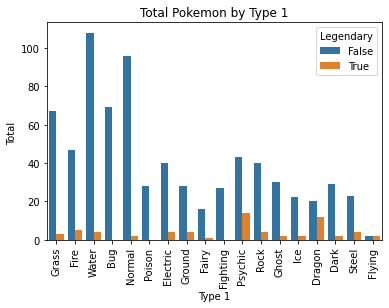

In [35]:
import seaborn as sns;
#sns.set_color_codes("colorblind")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3Train)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

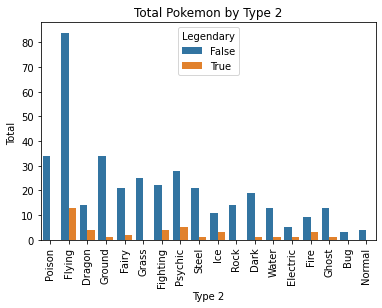

In [36]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3Train)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

Una cosa che si nota subito è che ci sono pochi pokemon leggendari magari in alcune tipologie sono piu presenti ma ... sono davvero in netta minoranza .
Nel primo caso la tipologia in maggioranza è quella dell'acqua , normal e bug(insetto) in effetti sono le piu comuni . Nel secondo caso invece i pokemon che volano hanno una nettissima maggioranza rispetto agli altri e questa maggioranza sta anche nella loro forma ( leggendaria ) , da appassionato infatti so che la maggior parte di pokemon leggendari volano . 

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [37]:
results3Train.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

Win Percentage
Type 1                  
Fairy           0.324492
Rock            0.404091
Steel           0.420625
Grass           0.432344
Bug             0.438120
Ice             0.439216
Poison          0.440936
Water           0.466923
Ghost           0.474262
Fighting        0.476298
Normal          0.536503
Ground          0.544386
Psychic         0.558435
Fire            0.584786
Dragon          0.633262
Electric        0.635179
Dark            0.635198
Flying          0.757979

In [38]:
graficoPercentualeWP = results3Train.groupby('Type 1')['Win Percentage'].mean().reset_index().sort_values(by = 'Win Percentage' ,ascending = False)

In [39]:
import plotly.express as px
px.bar(graficoPercentualeWP, x = "Type 1", y = "Win Percentage")

Le ultime due celle fanno vedere sia numericamente che graficamente le percentuali di vittorie in base alla tipologia 1 .
I pokemon di tipo volante, dark , elettrico e drago hanno una percentuale di vincita significativa rispetto agli altri tipi . Soprattutto quelli che volano come abbiamo anche visto in precedenza ... forse dato che volano sono anche molto piu veloci e possono sferrare/schivare piu attacchi . Rispetto ovviamente a pokemon statici 

## -----------------------------------------------------------------------------------------------------------------------------

In [40]:
results3Train.groupby('Type 1').agg({"Legendary": "mean"}).sort_values(by = "Legendary")

Legendary
Type 1             
Bug        0.000000
Poison     0.000000
Fighting   0.000000
Normal     0.020408
Water      0.035714
Grass      0.042857
Fairy      0.058824
Ghost      0.062500
Dark       0.064516
Ice        0.083333
Electric   0.090909
Rock       0.090909
Fire       0.096154
Ground     0.125000
Steel      0.148148
Psychic    0.245614
Dragon     0.375000
Flying     0.500000

Percentuali molto basse , ma me lo aspettavo  . Interessante vedere che le tre tipologie di pokemon Bug , Poison e Fighting non detengono pokemon leggendari , mentre il 50% di quelli di tipo Flying è di tipo leggendario.

# -----------------------------------------------------------------------------------------------------------

In [41]:
results3Train.groupby('Name').agg({"Speed": "mean"}).sort_values(by = "Speed")

Speed
Name                      
Shuckle                  5
Munchlax                 5
Ferroseed               10
Trapinch                10
Bonsly                  10
...                    ...
DeoxysAttack Forme     150
Deoxys Normal Forme    150
Mega Alakazam          150
Ninjask                160
Deoxys Speed Forme     180

[800 rows x 1 columns]

Il pokemon più lento è Schuckle infatti è il piu perdente ... mentre quello più veloce è Deoxys Speed Forme

# ------------------------------------------------------------------------------------------------------------

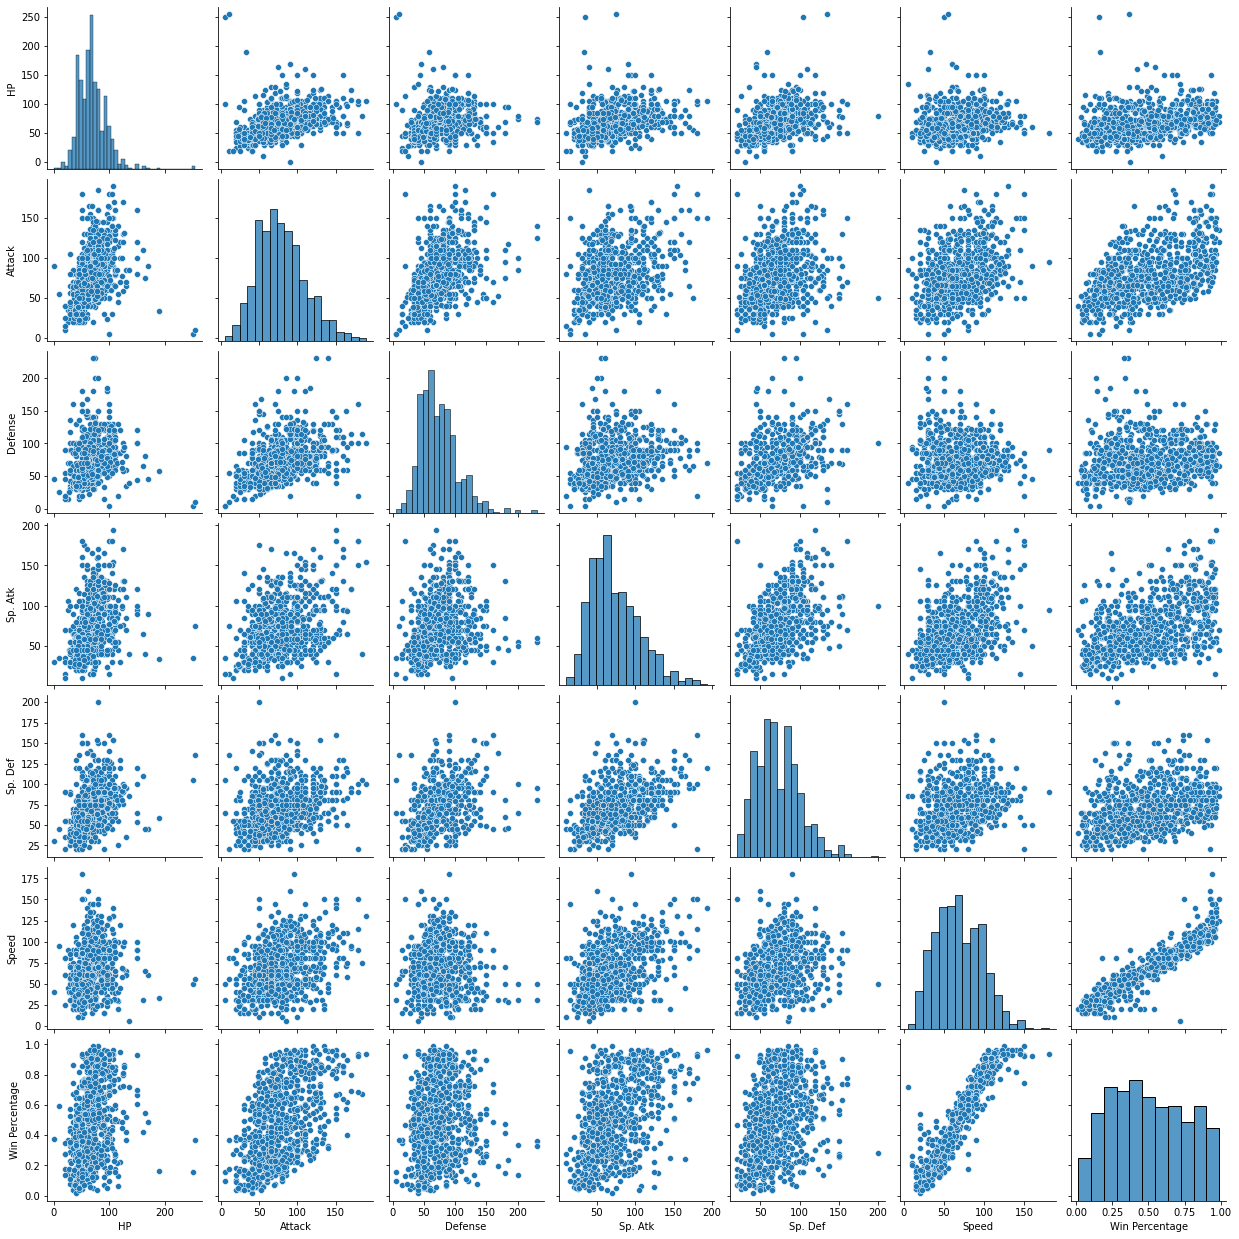

In [42]:
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
sns.pairplot(results3Train.loc[:,col].dropna())

Con il grafico pairplot seaborn riesco a tenere traccia delle relazioni che ci sono fra le variabili .. ed è molto molto motlo importante realizzare questo tipo di grafici per capire quanto sono fondamentali le relazioni fra le variabili per poi analizzarle al meglio , ed in piu la sua applicazione è semplicissima da realizzare (sono 2 righe di codice ) , selezionionando le variabili a piacere nel mio dataset . Nella diagonale del grafico si puo ben vedere quella che è chiamata distribuzione di ogni singola variabile infatti nella diagonale i valori delle x e y sono della stessa "famiglia" , mentre gli altri mini grafici posizionati sopra e sotto la diagonale mostrano la propria e vera relazione . 
Quello che mi interessa di più è la relazione tra ogni variabile indipendente e la variabile dipendente (Win Percentage) ovviamente quindi farò riferimento a quello .
Maggiore è l'affluenza di "puntini" verso la parte superiore di ogni mini grafico e piu la relazione è forte , facendo riferimento a questa osservazione posso dire che la velocità (Speed) e tutto ciò che riguarda l'attacco (Attack e Sp.Atk) hanno una relazione piu forte con la vittoria (Win Percentage) . Pensando a ciò che ho analizzato in precedenza il pokemon Shuckle non ha vinto nemmeno uno scontro e infatti ha 10 di attacco e 5 di velocità ( anche se ha un buon valore in difesa ) potrebbe essere anche un caso ma i valori (ora) facendo riferimento ai grafici parlano chiaro.


## ------------------------------------------------------------------------------------------------------------------------------

Adesso approfondirò il discorso sulla correlazione uno degli aspetti secondo me piu importanti per fare analisi dei dati (ci consente di capire quale dato è piu importante rispetto ad un altro) , concettualmente è simile a cio che è stato visto sopra con pairplot , dato che è cosi colgo l'occasione per verificare ancora meglio lo studio e efficienza dei dati poiche: mi aspetto dei dati simili e quindi delle considerazioni simili a quelle fatte sopra.

In [43]:
results3Train.loc[:,col].corr()

HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
HP              1.000000  0.422386  0.239622  0.362380  0.378718  0.175952   
Attack          0.422386  1.000000  0.438687  0.396362  0.263990  0.381240   
Defense         0.239622  0.438687  1.000000  0.223549  0.510747  0.015227   
Sp. Atk         0.362380  0.396362  0.223549  1.000000  0.506121  0.473018   
Sp. Def         0.378718  0.263990  0.510747  0.506121  1.000000  0.259133   
Speed           0.175952  0.381240  0.015227  0.473018  0.259133  1.000000   
Win Percentage  0.264598  0.492175  0.121563  0.473753  0.324998  0.930998   

                Win Percentage  
HP                    0.264598  
Attack                0.492175  
Defense               0.121563  
Sp. Atk               0.473753  
Sp. Def               0.324998  
Speed                 0.930998  
Win Percentage        1.000000

stampo prima a video i valori della correlazione , poi li stamperò graficamente e poi farò la mia breve considerazione

<AxesSubplot:title={'center':'Correlazione dei dati di Train'}>

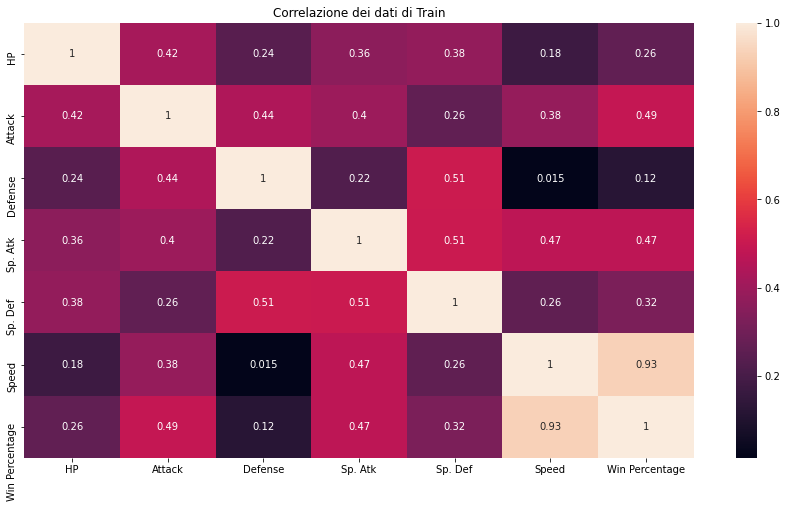

In [44]:
plt.figure(figsize=(15,8))
plt.title("Correlazione dei dati di Train")
sns.heatmap(data=results3Train.loc[:,col].corr(), annot=True)

Anche la correlazione è una misura e ci indica quanto due variabili sono correlate tra di loro. E' ripreso il concetto di prima e infatti come mi aspettavo le variabili piu correlate al Win Percentage sono su di tutti la velocità ( Speed ) e poi dopo verranno i valori di attacco (Attack) insieme a Sp.Atk . Per fortuna tutto coincide. I valori sulla diagonali sono tutti 1 e si dicono correllati in modo perfetto sono di colore bianco , gli altri invece cambiano tonalità a seconda del livello di correlazione (piu è scuro meno una variabile è correlata all'altra ) ad esempio la difesa è davvero poco correlata alla percentuale di vittorie . 
E' curioso notare che la metà superiore sopra la diagonale fornisce le stesse informazioni della metà inferiore.
All'inizio ripeto le stesse cose , ma meglio cosi per ribadire il concetto e essere sempre chiaro.

## ------------------------------------------------------------------------------------------------------------------------------

Dato che uno dei dati piu importanti è la velocità ovvero la Speed è giusto analizzarla piu in dettaglio ...

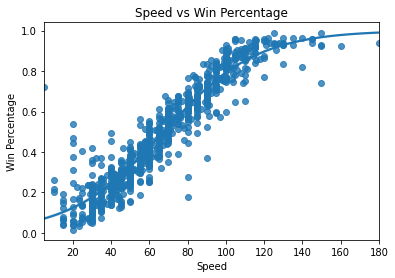

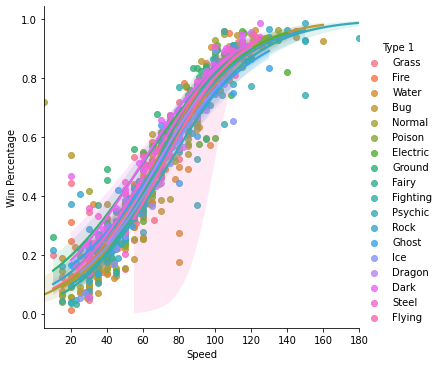

In [45]:
sns.regplot(x="Speed", y="Win Percentage", data=results3Train, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3Train, hue = 'Type 1',  logistic=True)

Ho fatto stampare e visualizzare meglio la distribuzione dei dati confrontando speed e % di vittoria , nel primo caso in forma generale mentre nel secondo in maniera piu specifica a seconda della tipologia del pokemon type 1  , e posso dire che la distribuzione è abbastanza varia(nella tipologia) a parte qualche eccezione , mentre è molto fitta e poco dispersiva (buono) , ad esempio grass e fire sono tipologie poco visibili nella parte superiore , ma tutte sono vicine tra loro  ..

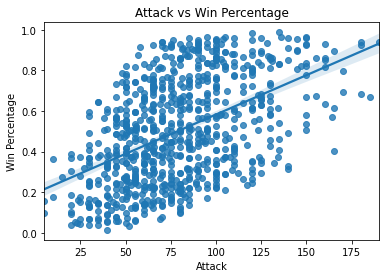

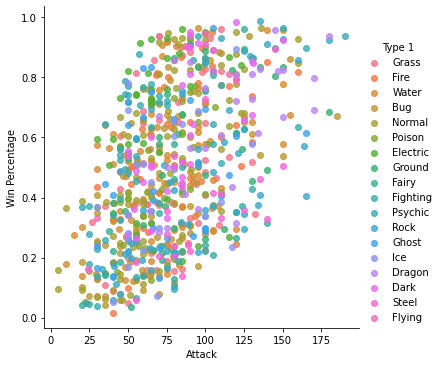

In [46]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results3Train).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=results3Train, hue = 'Type 1',fit_reg =False)

Stessa tipologia di grafici ma sviluppati per confrontare piu in dettaglio attacco e % di vittoria . Come si puo vedere in questo caso i dati sono molto piu staccati tra di loro , infatti per avere delle stime ho una retta! Nello scorso esempio no . Quindi i dati basati sull'attacco mi forniscono delle informazioni molto meno precise rispetto a quelle precedenti (speed) e infatti se andiamo a vedere la tabella della correlazione i dati di attacco sono sempre abbastanza correlati ma molto molto meno rispetto a quelli di speed . 

## ------------------------------------------------------------------------------------------------------------------------------

# Considerazioni finali (riassuntive) relative all'analisi dei dati. 

Tutte le osservazioni sono state fatte dopo ogni stampa , qui riporto le piu importanti (ma non sono tutte).
Partendo dall'inizio del mio lavoro posso affermare che :
I pokemon di tipo water , bug e grass sono i piu comuni nella tipologia 1 , mentre i pokemon flying , ground e poision sono i piu comuni come seconda tipologia . Dato che sono i più comuni bisognerebbe saperli combattere con piu facilità agendo in modo preventivo .
------------------------------------------------------------------------------------------------------------


Le tipologie dei pokemon che vincono di piu sono quelli di tipo flying , dark , dragon e eletric , mentre i pokemon che vincono di meno sono quelli di tipo fairy , rock , steel , grass.. . Quindi se dovessimo incontrare pokemon delle ultime tipologie incontrate è meglio non catturarli , sprecheremo solo energie e posti disponibili . Mentre dovremmo tentare sempre di catturare e far entrare nelle nostre pokeball quelli di tipo fairy , rock ecc , anche se sicuramente si sapranno difendere bene .. 

Slugma è il pokemon che perde di piu .. su 68 scontri ne è riuscito a vincere solo 1 ... con una percentuale di vittorie bassissima solo dello 1,4 %

Mega Aerodactyl invece sembra essere il pokemon piu forte su 82 scontri ne ha vinti 81 ... con una percentuale di vittorie altissima poco piu del 98% 

Ho notato anche che molti pokemon con prefisso Mega sono fortissimi e ho spiegato nella sezione relativa all'analisi il perchè

---------------------------------------------------------------------------------------------------------------

La difesa non è un attributo su cui possiamo puntare ... In questo caso la difesa è molto meno importante dell'attacco , infatti dall'analisi dei dati si capisce che abbiamo bisogno di attacchi potenti e velocità . Se guardiamo indietro ai primi 10 pokemon più vincenti, quasi tutti hanno velocità superiori a 100 e attacchi superiori a 100 . Mentre per i 10 pokemon piu perdenti questi due valori sono moolto bassi . 

# Inizio addestramento

## Score e mean absolute error
Inizio addestramento per cercare lo score e il mae , per l'accuracy invece dopo mi muovo in modo leggermente diverso , ho sperimentato l'analisi a "due vie" con ottimi risultati.

In [47]:
datasetTrain = results2Train

In [48]:
datasetTest = results2Test 

In [49]:
from sklearn.preprocessing import LabelEncoder
def Label_encode(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

La funzione Label econde ci aiuterà a normalizzare le etichette dato che alcune sono della forma string. Il parametro passato alla funzione "feat" rappresenterà gli elementi di ogni colonna .
Tutto ciò avviene grazie a LabelEncoder che ci permette appunto di trasformare etichette non numeriche in etichette numeriche.
.fit ci consente di evitare ripetizioni tra letterali .

In [50]:
dfTrainNorm = datasetTrain.copy()
for col in dfTrainNorm.columns:
    dfTrainNorm[str(col)] = Label_encode(dfTrainNorm[str(col)])
dfTrainNorm

Number [  1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38
  39  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76
  77  79  80  81  82  83  84  85  86  87  88  89  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 232 233 234 235 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255

Number  Name  Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0         0    67       9      13  17      24       23       41       37   
1         1   303       9      13  31      37       37       55       50   
2         2   729       9      13  51      57       55       71       66   
3         3   444       9      13  51      73       86       85       77   
4         4    86       6      18  11      27       18       36       22   
..      ...   ...     ...     ...  ..     ...      ...      ...      ...   
795     777   144      15       4  21      73       96       71       87   
796     778   413      15       4  21     104       76       98       73   
797     779   289      14       8  51      82       34       95       83   
798     780   290      14       1  51     104       34      100       83   
799     781   738       6      17  51      82       83       89       59   

     Speed  Generation  Legendary  First_pokemon  Second_pokemon  \
0       23           0          0             19              19   
1       37           0          0             26              26   
2       57           0          0             50              50   
3       57           0          0             39              39   
4       42           0          0             33              33   
..     ...         ...        ...            ...             ...   
795     28           5          1             21              21   
796     84           5          1             65              65   
797     47           5          1             34              34   
798     57           5          1             54              54   
799     47           5          1             49              49   

     Total Fights  Win Percentage  
0              23             142  
1              20             230  
2              26             421  
3              24             340  
4              16             316  
..            ...             ...  
795            10             211  
796            24             554  
797            16             330  
798            34             410  
799            31             386  

[782 rows x 16 columns]

In [51]:
dfTestNorm = datasetTest.copy()
for col in dfTestNorm.columns:
    dfTestNorm[str(col)] = Label_encode(dfTestNorm[str(col)])
dfTestNorm

Number [  1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38
  39  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76
  77  79  80  81  82  83  84  85  86  87  88  89  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 177 178 179 180 181 182 184 185 186 187 188 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 232 233 234 235 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259

Number  Name  Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0         0    66       9      13  17      22       23       41       37   
1         1   300       9      13  31      35       37       55       50   
2         2   723       9      13  51      55       55       71       66   
3         3   441       9      13  51      71       86       85       77   
4         4    85       6      18  11      25       18       36       22   
..      ...   ...     ...     ...  ..     ...      ...      ...      ...   
795     770   143      15       4  21      71       96       71       87   
796     771   410      15       4  21     102       76       98       73   
797     772   287      14       8  51      80       34       95       83   
798     773   288      14       1  51     102       34      100       83   
799     774   732       6      17  51      80       83       89       59   

     Speed  Generation  Legendary  First_pokemon  Second_pokemon  \
0       24           0          0              9               9   
1       38           0          0              6               6   
2       58           0          0             20              20   
3       58           0          0             16              16   
4       43           0          0             11              11   
..     ...         ...        ...            ...             ...   
795     29           5          1              8               8   
796     85           5          1             29              29   
797     48           5          1             11              11   
798     58           5          1             15              15   
799     48           5          1             12              12   

     Total Fights  Win Percentage  
0               9              78  
1               9              51  
2               9             170  
3               6             180  
4              11              82  
..            ...             ...  
795             9              70  
796            13             186  
797            10              89  
798             8             140  
799            10              99  

[775 rows x 16 columns]

In [52]:
# Normalizzo nell'intervallo [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

names = dfTrainNorm.columns # nomi di tutte le colonne
train_new = scaler.fit_transform(dfTrainNorm)
train = pd.DataFrame(train_new, columns=names)

names = dfTestNorm.columns # nomi di tutte le colonne
test_new = scaler.fit_transform(dfTestNorm)
test = pd.DataFrame(test_new, columns=names)

In [53]:
x_train = train.drop(["Win Percentage"], axis=1)
y_train = train["Win Percentage"]

x_test = test.drop(["Win Percentage"], axis=1)
y_test = test["Win Percentage"]

In [54]:
x_test

Number      Name    Type 1    Type 2        HP    Attack   Defense  \
0    0.000000  0.085271  0.529412  0.722222  0.186813  0.203704  0.225490   
1    0.001292  0.387597  0.529412  0.722222  0.340659  0.324074  0.362745   
2    0.002584  0.934109  0.529412  0.722222  0.560440  0.509259  0.539216   
3    0.003876  0.569767  0.529412  0.722222  0.560440  0.657407  0.843137   
4    0.005168  0.109819  0.352941  1.000000  0.120879  0.231481  0.176471   
..        ...       ...       ...       ...       ...       ...       ...   
770  0.994832  0.184755  0.882353  0.222222  0.230769  0.657407  0.941176   
771  0.996124  0.529716  0.882353  0.222222  0.230769  0.944444  0.745098   
772  0.997416  0.370801  0.823529  0.444444  0.560440  0.740741  0.333333   
773  0.998708  0.372093  0.823529  0.055556  0.560440  0.944444  0.333333   
774  1.000000  0.945736  0.352941  0.944444  0.560440  0.740741  0.813725   

      Sp. Atk   Sp. Def     Speed  Generation  Legendary  First_pokemon  \
0    0.398058  0.411111  0.224299         0.0        0.0       0.272727   
1    0.533981  0.555556  0.355140         0.0        0.0       0.181818   
2    0.689320  0.733333  0.542056         0.0        0.0       0.606061   
3    0.825243  0.855556  0.542056         0.0        0.0       0.484848   
4    0.349515  0.244444  0.401869         0.0        0.0       0.333333   
..        ...       ...       ...         ...        ...            ...   
770  0.689320  0.966667  0.271028         1.0        1.0       0.242424   
771  0.951456  0.811111  0.794393         1.0        1.0       0.878788   
772  0.922330  0.922222  0.448598         1.0        1.0       0.333333   
773  0.970874  0.922222  0.542056         1.0        1.0       0.454545   
774  0.864078  0.655556  0.448598         1.0        1.0       0.363636   

     Second_pokemon  Total Fights  
0          0.272727          0.45  
1          0.181818          0.45  
2          0.606061          0.45  
3          0.484848          0.30  
4          0.333333          0.55  
..              ...           ...  
770        0.242424          0.45  
771        0.878788          0.65  
772        0.333333          0.50  
773        0.454545          0.40  
774        0.363636          0.50  

[775 rows x 15 columns]

In [55]:
def ml_linearreg(x_train, x_test, y_train, y_test):
    #Adattamento della Multiple Linear Regression al Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    print(regressor.score(x_train, y_train))
    #Previsione dei risultati del set di test
    y_pred = regressor.predict(x_test)

    #RISULTATI
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    return mae

ml_linearreg(x_train, x_test, y_train, y_test)

0.988482737933401


0.06998318336240512

ml_linearreg funzione definita per calcolare il Mean Absolute Error (MAE) argomento studiato durante il corso , rappresenta la distanza tra il valore predetto e quello effettivo. Trattandosi di una distanza, non esistono valori negativi. Infatti si chiama assoluto.
In questo caso è stato calcolato e il risultato sembra essere molto buono!!
L'uso della regressione lineare mi ha aiutato a raggiungere un buon obiettivo , le regressione lineare è stato un argomento abbastanza approfondito durante il corso di IA.
Printati lo score della regression e mae .

## ACCURACY

Ecco il calcolo dell'accuracy , ho deciso di svolgerlo con riferimenti diversi rispetto al calcolo della mae , le mie spiegazioni a riguardo sono in basso!! . 

In [56]:
combatTrain["First_win"] = combatTrain.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0, axis=1)
combatTest["First_win"] = combatTest.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0, axis=1)

Spiego quanto fatto nella cella sopra .. ho aggiunto sia a combatTrain che a combatTest la feature "First_win" che prende il valore di 1 se il pokemon in prima posizione ha vinto e invece 0 se ha perso . Mi serve poichè per analizzare sopratutto l'accuracy servono le "continuos" value .  

In basso invece faccio il "merge" in modo molto semplice fra i dati della tabella pokemon con quelli della tabella combat ovviamente tutto deve essere riportato sia per il primo che secondo pokemon 

In [57]:
speed_dict = dict(zip(pokemon['Number'], pokemon['Speed']))
attack_dict = dict(zip(pokemon['Number'], pokemon['Attack']))
spattack_dict = dict(zip(pokemon['Number'], pokemon['Sp. Atk']))
#I primi 3 i dati piu importanti per la valutazione solo con questi l'accurcy è del 93.6%
defense_dict = dict(zip(pokemon['Number'], pokemon['Defense'])) #infatti con questo parametro è praticamente identica
spdefense_dict = dict(zip(pokemon['Number'], pokemon['Sp. Def']))
hp_dict = dict(zip(pokemon['Number'], pokemon['HP']))
gen_dict= dict(zip(pokemon['Number'],pokemon['Generation']))


combatTrain["First_pokemon_speed"] = combatTrain["First_pokemon"].replace(speed_dict)
combatTest["First_pokemon_speed"] = combatTest["First_pokemon"].replace(speed_dict)

combatTrain["Second_pokemon_speed"] = combatTrain["Second_pokemon"].replace(speed_dict)
combatTest["Second_pokemon_speed"] = combatTest["Second_pokemon"].replace(speed_dict)

combatTrain["First_pokemon_attack"] = combatTrain["First_pokemon"].replace(attack_dict)
combatTest["Second_pokemon_attack"] = combatTest["Second_pokemon"].replace(attack_dict)

combatTrain["First_pokemon_spatk"] = combatTrain["First_pokemon"].replace(spattack_dict)
combatTest["Second_pokemon_spatk"] = combatTest["Second_pokemon"].replace(spattack_dict)

combatTrain["First_pokemon_defense"] = combatTrain["First_pokemon"].replace(defense_dict)
combatTest["Second_pokemon_defense"] = combatTest["Second_pokemon"].replace(defense_dict)

combatTrain["First_pokemon_spdef"] = combatTrain["First_pokemon"].replace(spdefense_dict)
combatTest["Second_pokemon_spdef"] = combatTest["Second_pokemon"].replace(spdefense_dict)

combatTrain["First_pokemon_hp"] = combatTrain["First_pokemon"].replace(hp_dict)
combatTest["Second_pokemon_hp"] = combatTest["Second_pokemon"].replace(hp_dict)

combatTrain["First_pokemon_gen"] = combatTrain["First_pokemon"].replace(gen_dict)
combatTest["Second_pokemon_gen"] = combatTest["Second_pokemon"].replace(gen_dict)


combatTrain #combatTest è uguale , stampo per vedere cosa ho ottenuto.

Winner  First_pokemon  Second_pokemon  First_win  First_pokemon_speed  \
0           8              8             623          1                  100   
1         517            517              88          1                   50   
2         563             49             563          0                   30   
3         394            391             394          0                   51   
4         380            380             483          1                   75   
...       ...            ...             ...        ...                  ...   
29995      51             51              54          1                   50   
29996     306            440             306          0                   50   
29997      63             22              63          0                   71   
29998     715            715             568          1                  108   
29999      22            632              22          0                   65   

       Second_pokemon_speed  First_pokemon_attack  First_pokemon_spatk  \
0                        97                   130                  130   
1                        30                   100                  110   
2                        70                    50                   75   
3                       115                    68                   72   
4                        74                    95                   40   
...                     ...                   ...                  ...   
29995                    45                    80                  110   
29996                    80                    66                   81   
29997                    95                    60                   50   
29998                    80                    72                  129   
29999                    71                    65                   80   

       First_pokemon_defense  First_pokemon_spdef  First_pokemon_hp  \
0                        111                   85                78   
1                        125                   50               100   
2                         55                   65                45   
3                         83                   87                99   
4                         50                   50                45   
...                      ...                  ...               ...   
29995                     85                   90                75   
29996                     68                   76                64   
29997                     55                   50                63   
29998                     90                   90                91   
29999                     40                   40                40   

       First_pokemon_gen  
0                      1  
1                      4  
2                      1  
3                      3  
4                      3  
...                  ...  
29995                  1  
29996                  4  
29997                  1  
29998                  5  
29999                  5  

[30000 rows x 12 columns]

Come gia detto in precedenza non mi sono basato sulla stessa tabella di prima ma su un'altra facendo un nuovo merge in modo da differenziare le cose per rendere il tutto piu comprensibile , magari se avessi fatto tutto cio con la tabella result2Train e Test potevo ottenere dei risultati piu precisi poichè analizzavo l'accuracy con piu feature . Ma ho deciso svolgere in questo modo l'esercizio per maneggiare anche i dict (argomento del corso) ed essere piu libero di analizzare i dati a piacimento e comunque avrei dovuto elidere tutte le righe con i valori NaN dai dati se avessi utilizzato l'altra via poiche nelle type è pieno e quindi forse i risultati risulterebbero sballati (di poco) e molto inferiori poichè molti pokemon non hanno 2 type .   

In [58]:
# Normalizzo nell'intervallo [0,1] anche se in questo caso serve a poco 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

names = combatTrain.columns # nomi di tutte le colonne
x_trainAcc = scaler.fit_transform(combatTrain)
y_trainAcc = pd.DataFrame(x_trainAcc, columns=names)

names = combatTest.columns # nomi di tutte le colonne
x_testAcc = scaler.fit_transform(combatTest)
y_testAcc = pd.DataFrame(x_testAcc, columns=names)

In [59]:
x_trainAcc = combatTrain.drop(["First_win"], axis=1)
y_trainAcc = combatTrain["First_win"]

x_testAcc = combatTest.drop(["First_win"], axis=1)
y_testAcc = combatTest["First_win"]

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(x_trainAcc, y_trainAcc)

print("Accuracy: {:.3f}".format(tree.score(x_testAcc, y_testAcc)*100))

Accuracy: 88.440


--------------------------------------------------------------------------------------------------------------

Utilizzo altra tecnica per calcolare accurcy è quella del RandomForestClassifier (non affrontato durante il corso, spiegazione in basso)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()  #definizione 
rfc.fit(x_trainAcc, y_trainAcc)

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
   
    print('PERFORMANCES :')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy*100))
    print('\nFinal Accuracy Value:')
    return accuracy*100

evaluate(rfc, x_testAcc, y_testAcc)

PERFORMANCES :
Average Error: 0.0685 degrees.
Accuracy = 93.15%.

Final Accuracy Value:


93.15

Dato che non è stato argomento d'esame riporto cio che ho capito dell 'algoritmo RFC come fatto nella challenge di prova . Random Forest Classifier consiste in centinaia di migliaia di alberi decisionali. Il numero di alberi dipende dalla natura del set di training e da altri parametri come il numero di classi (bean ,profondità).Il numero ottimale di alberi può essere trovato usando la “convalida incrociata”, dall’inglese cross-validation, per la divisione del set di dati. Altrimenti, può essere trovato osservando l'errore out-of-bug che è espresso in termini di errore di training e test. Dopo vengono calcolate le distanze per ogni coppia di casi. Quando due casi occupano lo stesso nodo target, la prossimità viene aumentata di uno per ciascun caso. Tuttavia, alla fine di ogni iterazione, i valori di prossimità vengono normalizzati dividendoli per il numero di alberi, che sono stati costruiti e specificati durante il periodo di allenamento. Il calcolo della distanza dei casi ha molti contributi per migliorare la previsione. 
Comunque il risultato varia di poco rispetto al precedente , soprattutto l'average error (verifica in piu con applicazioni di 2 diverse strategie di calcolo) !

---------------------------------------------------------------------------------------------------------------

In [62]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_trainAcc, y_trainAcc)
acc_gaussian = round(gaussian.score(x_testAcc, y_testAcc) * 100, 2)
acc_gaussian

69.63

Di quanto è diminuta! Con il metodo gaussianNB! Meglio affidarsi ad altre tipologie di metodi .. (in questo caso).
L'algoritmo è considerato semplice (e ingenuo) perché si basa sull'assunzione di indipendenza condizionale della caratteristica che raramente è vera nella realtà. Piu dati a disposizione si hanno e migliore sarà la sua riuscita.. basato sul teorema di Bayes è un algoritmo abbastanza datato , ma oggi in qualche caso particolare funziona discretamente. Meno parametri da analizzare ho meno è precisa l'accuracy ad esempio con i soli 3 parametri standard : First Pokemon , Second Pokemon e Winner l'accuracy era del 52% !!!

### Made by Alessandro Giovannini matricola 520310